# <center> Analysez les ventes d'une librairie avec Python </center>

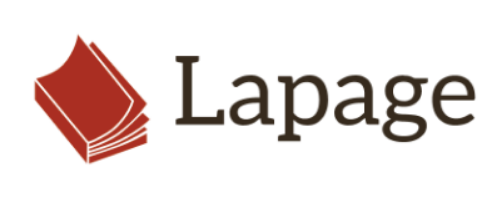

# <center> Préparation des données </center>

### Sommaire:

* [I) Introduction](#chapter1)

    * [1) Importation des librairies, des données et déclarations des fonctions](#section_1_1)
    
* [II) Étude des données](#chapter2)
    * [1) Fichier CUSTOMERS](#section_2_1)
    * [2) Fichier PRODUCTS](#section_2_2)
    * [3) Fichier TRANSACTIONS](#section_2_3)
    
* [III) Jointure des fichiers](#chapter3)

* [IV) Exportation](#chapter4)

## I) Introduction <a class="anchor" id="chapter1"></a>

LAPAGE a ouvert sa librairie en ligne il y a deux ans et désire à présent faire un point afin de décider des prochaines marches à suivre. Par exemple, décider si il faut créer certaines offres, adapter certains prix, etc.

Pour cela, 3 fichiers de données sont à disposition (customers, products et transactions).
Nous allons, dans ce notebook, prendre connaissance de ces données et essayer de les rendre le plus exploitables possible, au sein d'un seul et même fichier, pour de futurs observations et tests.
***

### 1) Importation des librairies, des données et déclarations des fonctions: <a class="anchor" id="section_1_1"></a>

Dans un premier temps nous importons les librairies et les fichiers de données, et déclarons une fonction de vérification de doublons qui nous servira notamment à nous assurer de l'unicité de nos clés avant la jointure des fichiers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cus_df = pd.read_csv('customers.csv')
pro_df = pd.read_csv('products.csv')
tra_df = pd.read_csv('transactions.csv')

In [3]:
def check_duplicates(df, colonne): #compare la taille du dataframe avant et après la suppression des doublons
    if df.size == df.drop_duplicates(colonne).size : 
        print ('Il n\'y a pas de doublons dans', colonne, ' et peut donc être utilisé comme clé primaire.')
    else :
        print ('Il y a au moins un doublon dans', colonne, ' et ne peut donc pas être utilisé comme clé primaire.')
    print (df.shape)

-------------------------------------------------------------------------------------------------------------------------------

## II) Étude des données <a class="anchor" id="chapter2"></a>

Nous allons ici étudier un à un nos 3 fichiers à la recherche de valeurs manquantes, de doublons, etc.
Le but ici est de comprendre au maximum nos données en vu de la jointure que nous aurons à réaliser.
***

##### Fichier CUSTOMERS : <a class="anchor" id="section_2_1"></a>

In [4]:
cus_df.info() #nan et type ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
cus_df #identifiant client unique + genre + date de naissance

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [6]:
cus_df.describe(include='all') #2 genre- ok // année de naissance ok 

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [7]:
# vérifiaction de l'existence de doublons dans la clé 'client_id'
check_duplicates(cus_df, ['client_id'])

Il n'y a pas de doublons dans ['client_id']  et peut donc être utilisé comme clé primaire.
(8623, 3)


In [8]:
#vérification si client_id anormaux
cus_df.sort_values(by='client_id')

# id de 'c_1' à 'c_...'
# 2 valeurs 'ct_0' et 'ct_1' étranges - comptes test/admin ?

,client_id,sex,birth
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
94,c_997,f,1994
2145,c_998,m,2001
7358,c_999,m,1964
2735,ct_0,f,2001


-------------------------------------------------------------------------------------------------------------------------------

##### Fichier PRODUCTS : <a class="anchor" id="section_2_2"></a>

In [9]:
pro_df.info() # nan ok // type ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
pro_df # identifiant produit + prix + catégorie

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [11]:
pro_df.describe(include='all') #'prix' minimum négtatif ? 

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [12]:
pro_df['categ'].value_counts() # 3 catégories de produit: 0, 1, 2

0    2309
1     739
2     239
Name: categ, dtype: int64

In [13]:
pro_df.sort_values(by='price') # T_0 < 0€ -> code remise ? produit test ?

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


On isole rapidement nos différentes catégories afin de repérer d'éventuelles particularité ou erreurs:

In [14]:
categ_0 = pro_df[pro_df['categ'] == 0]
categ_0.sort_values(by='price')

,id_prod,price,categ
731,T_0,-1.00,0
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
569,0_197,37.99,0
2663,0_1581,37.99,0
1360,0_494,39.58,0
2809,0_2147,39.99,0


In [15]:
categ_1 = pro_df[pro_df['categ'] == 1]
categ_1.sort_values(by='price')

,id_prod,price,categ
3243,1_238,2.00,1
2853,1_332,2.24,1
2496,1_36,2.64,1
2366,1_58,2.95,1
1278,1_473,2.99,1
...,...,...,...
2962,1_608,72.75,1
2827,1_171,73.99,1
808,1_10,78.83,1
879,1_679,79.99,1


In [16]:
categ_2 = pro_df[pro_df['categ'] == 2]
categ_2.sort_values(by='price')

,id_prod,price,categ
3099,2_33,30.99,2
390,2_45,32.99,2
3095,2_67,32.99,2
770,2_107,33.99,2
1717,2_152,34.23,2
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [17]:
# vérification doublons 'id_prod'
check_duplicates(pro_df, ['id_prod'])

Il n'y a pas de doublons dans ['id_prod']  et peut donc être utilisé comme clé primaire.
(3287, 3)


-------------------------------------------------------------------------------------------------------------------------------

##### Fichier TRANSACTIONS : <a class="anchor" id="section_2_3"></a>

In [18]:
tra_df.info() # nan ok // date type object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [19]:
tra_df # identifiant produit + date de la transaction + identifiant de session + identifiant client

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [20]:
tra_df.describe(include='all') # date = 'test...' ??

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [21]:
# classement par id_prod:
tra_df.sort_values(by='id_prod')

,id_prod,date,session_id,client_id
451581,0_0,2021-11-01 08:28:59.218606,s_113104,c_8304
475039,0_0,2022-05-30 05:37:55.969175,s_216203,c_6714
678308,0_0,2021-12-10 21:27:22.153849,s_132469,c_2768
526168,0_0,2022-02-22 02:42:41.449073,s_168934,c_3513
245483,0_0,2021-03-05 08:20:12.077919,s_2008,c_6573
...,...,...,...,...
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
145501,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_1
311604,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1
504032,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1


On retrouve ici le produit "T_0" identifié précedemment. Celui semble correspondre à une date, une session et un client bien précis.
Vérifions cela:

In [22]:
# liste des transactions de T_0:
test = tra_df[tra_df['id_prod'] == 'T_0']
test

# 200 lignes

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [23]:
# liste des transactions de la session s_0
s_test = tra_df[tra_df['session_id'] == 's_0']
s_test

# 200 lignes

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [24]:
# valeurs de 'client_id' lorsque 'id_prod' = T_0
test['client_id'].value_counts()

ct_0    106
ct_1     94
Name: client_id, dtype: int64

In [25]:
# valeurs de 'session_id' lorsque 'id_prod'=T_0
test['session_id'].value_counts()

s_0    200
Name: session_id, dtype: int64

In [26]:
# dataframe sans les données de test
tra_no_test = tra_df[tra_df['id_prod']!='T_0']

In [27]:
# vérification de la présence de ct_0/1
tra_ct = tra_no_test[(tra_no_test['client_id']=='ct_0') | (tra_no_test['client_id']=='ct_1')]
tra_ct

# pas de ct_0/1 restant

,id_prod,date,session_id,client_id


In [28]:
# vérification de la présence de s_0
tra_s0 = tra_no_test[tra_no_test['session_id']=='s_0']
tra_s0

# pas de s_0 restant

,id_prod,date,session_id,client_id


In [29]:
# vérification de la présence de date='test...'
tra_no_test.sort_values(by='date')

# pas de date='test...' restant
# date max = 28 fév. 2023

,id_prod,date,session_id,client_id
480642,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
184649,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
588183,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
130172,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
550455,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


On comprends donc que le produit "T_0" correspond à un produit "test" surement utilisé dans le cadre de vérification. Par extension la session "s_0", les clients "ct_0" et "ct_1" ainsi que les dates "test_..." sont des données factices que nous ne souhaitons pas utiliser lors de nos analyses.

-------------------------------------------------------------------------------------------------------------------------------

### III) Jointure des fichiers : <a class="anchor" id="chapter3"></a>

Nous avons désormais une meilleure connaissance de nos 3 fichiers et allons pouvoir les joindre.

Dans un premier temps, nous optons pour des jointures "outer" afin de garder le maximum d'informations.

Nous affinerons notre nettoyage dans un second temps afin d'obtenir notre fichier "finale".

***

In [30]:
# jointure des 3 fichiers en 'outer' afin de ne perdre aucune données:
merge1 = tra_df.merge(cus_df, how='outer', on='client_id')
merge_all = merge1.merge(pro_df, how='outer', on='id_prod')
merge_all

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679569,0_1624,NaN,NaN,NaN,NaN,NaN,24.50,0.0
679570,2_86,NaN,NaN,NaN,NaN,NaN,132.36,2.0
679571,0_299,NaN,NaN,NaN,NaN,NaN,22.99,0.0
679572,0_510,NaN,NaN,NaN,NaN,NaN,23.66,0.0


In [31]:
# drop des 200 lignes tests identifiées précédemment:
merge_notest = merge_all.loc[merge_all['id_prod'] != "T_0"]
merge_notest

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679569,0_1624,NaN,NaN,NaN,NaN,NaN,24.50,0.0
679570,2_86,NaN,NaN,NaN,NaN,NaN,132.36,2.0
679571,0_299,NaN,NaN,NaN,NaN,NaN,22.99,0.0
679572,0_510,NaN,NaN,NaN,NaN,NaN,23.66,0.0


On constate des valeurs manquantes suite à la jointure.
Isolons-les:

In [32]:
merge_notest.loc[merge_notest['session_id'].isna()]

,id_prod,date,session_id,client_id,sex,birth,price,categ
679532,NaN,NaN,NaN,c_8253,f,2001.0,NaN,NaN
679533,NaN,NaN,NaN,c_3789,f,1997.0,NaN,NaN
679534,NaN,NaN,NaN,c_4406,f,1998.0,NaN,NaN
679535,NaN,NaN,NaN,c_2706,f,1967.0,NaN,NaN
679536,NaN,NaN,NaN,c_3443,m,1959.0,NaN,NaN
679537,NaN,NaN,NaN,c_4447,m,1956.0,NaN,NaN
679538,NaN,NaN,NaN,c_3017,f,1992.0,NaN,NaN
679539,NaN,NaN,NaN,c_4086,f,1992.0,NaN,NaN
679540,NaN,NaN,NaN,c_6930,m,2004.0,NaN,NaN
679541,NaN,NaN,NaN,c_4358,m,1999.0,NaN,NaN


Il y a en effet des lignes contenant des données incomplètes, beaucoup ne possèdant ni de "date", ni de "session_id".
Il s'agirait donc de produits non-vendus ou de clients inactifs.

Dans les 2 cas il s'agit d'informations dont nous n'avons pas besoin pour nos analyses futures.
En effet on ne souhaite conserver que les lignes correspondant à une transaction donc ayant un "session_id" non-nul:

In [33]:
merge_sok = merge_notest[~merge_notest['session_id'].isna()]
merge_sok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  float64
 6   price       679111 non-null  float64
 7   categ       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


Il reste toujours 221 valeurs manquantes, identifions les:

In [34]:
pri_nul = merge_sok[merge_sok['price'].isna()]
pri_nul

,id_prod,date,session_id,client_id,sex,birth,price,categ
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN
...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN


In [35]:
# On retrouve bien les 221 lignes manquantes.
# Il semble n'y avoir qu'un produit pour lequel nous n'avons pas d'information:

pri_nul['id_prod'].value_counts()

0_2245    221
Name: id_prod, dtype: int64

Le nom de chaque "id_prod" suit un schéma précis. En effet le premier chiffre correspond à la catégorie du produit.
Pour le produit '0_2245' on sait donc que sa catégorie est '0'.

Il nous est impossible de deviner précisement et à coup sûr le prix de ce produit mais perdre ces chiffres de ventes pourrait être préjudiciable par la suite.
On choisit donc de l'estimer, en se basant sur la moyenne des prix de sa catégorie:

In [36]:
categ_0 = merge_sok[merge_sok['categ'] == 0.0]
round(categ_0['price'].mean(), 2)

10.64

In [37]:
# On remplace la catégorie par '0' et la prix par '10.64' pour chaque ligne correspondant au produit 0_2245:
values = {'categ': 0, 'price': 10.64}
merge_full = merge_sok.fillna(value=values)

merge_full[merge_full['id_prod'] == '0_2245']

,id_prod,date,session_id,client_id,sex,birth,price,categ
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,10.64,0.0
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,10.64,0.0
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,10.64,0.0
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,10.64,0.0
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,10.64,0.0
...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,10.64,0.0
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,10.64,0.0
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,10.64,0.0
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,10.64,0.0


In [38]:
# On vérifie qu'il n'y plus de données manquantes:
merge_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  float64
 6   price       679332 non-null  float64
 7   categ       679332 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


### IV) Exportation : <a class="anchor" id="chapter4"></a>

Afin d'avoir un fichier de travail plus complet, on souhaite ajouter:
- une colonne "âge"
- des colonnes détaillant les dates des transactions (année, mois, jour, etc ...)

In [39]:
#Pour déterminer l'âge des clients on fait simplement la différence entre l'année de notre analyse (2023) et l'année de naissance:
merge_full['âge'] = 2023 - merge_full['birth']

In [40]:
#On passe la colonne 'date' en type 'datetime'
merge_full['date'] = pd.to_datetime(merge_full['date'])

#On crée les colonnes correspondant aux années, mois, jours et heures des transacations:
merge_full['year'] = merge_full['date'].dt.year
merge_full['month'] = merge_full['date'].dt.month
merge_full['day'] = merge_full['date'].dt.day
merge_full['hour'] = merge_full['date'].dt.hour

#Harmonisation du noms des colonnes:
merge_full.rename(columns={'sex': 'genre',
                           'birth': 'année de naissance',
                           'price': 'prix',
                           'categ': 'catégorie',
                           'year': 'année',
                           'month': 'mois',
                           'day': 'jour',
                           'hour': 'heure'}, inplace = True)

#Passage des variables catégorie et âge en interger:
merge_final = merge_full.astype({"année de naissance": 'int64', "catégorie": 'int64', "âge": 'int64'})

merge_final.head()

,id_prod,date,session_id,client_id,genre,année de naissance,prix,catégorie,âge,année,mois,jour,heure
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,37,2022,5,20,13
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0,37,2021,7,20,13
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0,37,2022,8,20,13
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0,55,2021,5,9,11
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0,55,2022,5,30,1


-------------------------------------------------------------------------------------------------------------------------------

On peut maintenant exporter notre dataframe "final" afin de l'exploiter sur un autre notebook:

In [41]:
merge_final.to_csv(r'C:\Users\MSI\P6_OpenClassrooms\Lapage_data.csv', index = False)